# Analiza podataka (sreća u svijetu)

* Podatci korišteni u radu: https://www.kaggle.com/unsdsn/world-happiness?select=2015.csv

Podatci dolaze iz izvještaja o svjetskoj sreći koje je objavljeno 20. ožujka 2015. godine od strane UN-a povodom međunarodnog dana sreće. Sreća pojedinca ocijenjena je pomoću Cantrilove ljestvice koja sadrži 10 stepenica, gdje 0 označava najgori mogući život dok 10 predstavlja najbolji mogući život. Pojedinci su pitani sljedeće pitanje: „Ovdje je slika ljestvi. Pretpostavimo da vrh ljestvi predstavlja najbolji mogući život za vas, a dno ljestvi najgori mogući život. Prema vašem osobnom osjećaju, gdje ste trenutno na ovim ljestvama?" (skala odgovora od 0 – 10) Nakon ocjenjivanja sreće, podatci također sadrže procjenu čimbenika koji mogu pridonijeti skali sreće što znači da ukoliko je sreća pojedinca u državi je ocjenjena s 8, a jedan čimbenik sadrži ocjenu od 2, taj je čimbenik onda zaslužan za 2/8 sreće u određenoj državi. Primjeri takvih čimbenika su: ekonomija (bdp), obiteljski odnosi, zdravlje (životni vijek), sloboda pojedinca, odsutnost političke korupcije, velikodušnost stanovništva
<br><br><br>

### Napomena: sljedeći dio će sadržavati kodove koji se koriste kako bi se pripremili podatci i vizualizacija podataka koji će se koristiti u tekstu (svi tekstovi koji se nalaze u tamnoj pozadini mogu se preskočiti) <br><br><br>

Plan rada:
* Pripremiti podatke za analizu
* Pokazati korelacije za sreću
* Prikazati razliku u regijama
* Prikazati podatke za hrvatsku gdje se nalazi
* Prikazati svaki pojedini pojam 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

podatci = pd.read_csv('PodatciStanovnistvo.csv')
podatci.index = np.arange(1, len(podatci)+1)
podatci.drop("Standard Error", axis=1, inplace=True)
podatci = podatci.rename(columns={
    "Happiness Rank": "Pozicija",
    "Country": "Država",
    "Region": "Regija",
    "Happiness Score": "Sreća (0-10)",
    "Economy (GDP per Capita)": "BDP po stanovniku",
    "Family": "Obiteljski odnosi",
    "Health (Life Expectancy)": "Zdravlje (životni vijek)",
    "Freedom": "Sloboda",
    "Trust (Government Corruption)": "Odsutnost političke korupcije",
    "Generosity": "Velikodušnost stanovništva",
    "Dystopia Residual": "Ostatak (neobjašnjive komponente)"
})

podatci

,Država,Regija,Pozicija,Sreća (0-10),BDP po stanovniku,Obiteljski odnosi,Zdravlje (životni vijek),Sloboda,Odsutnost političke korupcije,Velikodušnost stanovništva,Ostatak (neobjašnjive komponente)
1,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
154,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
155,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
157,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<br><br><br>Prema podatcima može se vidjeti kako su slabo razvijene države (uglavnom Afričke zemlje) na dnu tablice dok se razvijene države nalaze na vrhu. Iz ovog razloga moguće je pretpostaviti da ekonomsko stanje države najviše utječe na sreću stanovništva. Kako bi utvrdili pretpostavku i uočili neke druge moguće korelacije među ostalim čimbenicima, vrijedi vizualizirati koeficijent korelacije između svakog čimbenika i sreće pojedinca u državi<br><br><br>

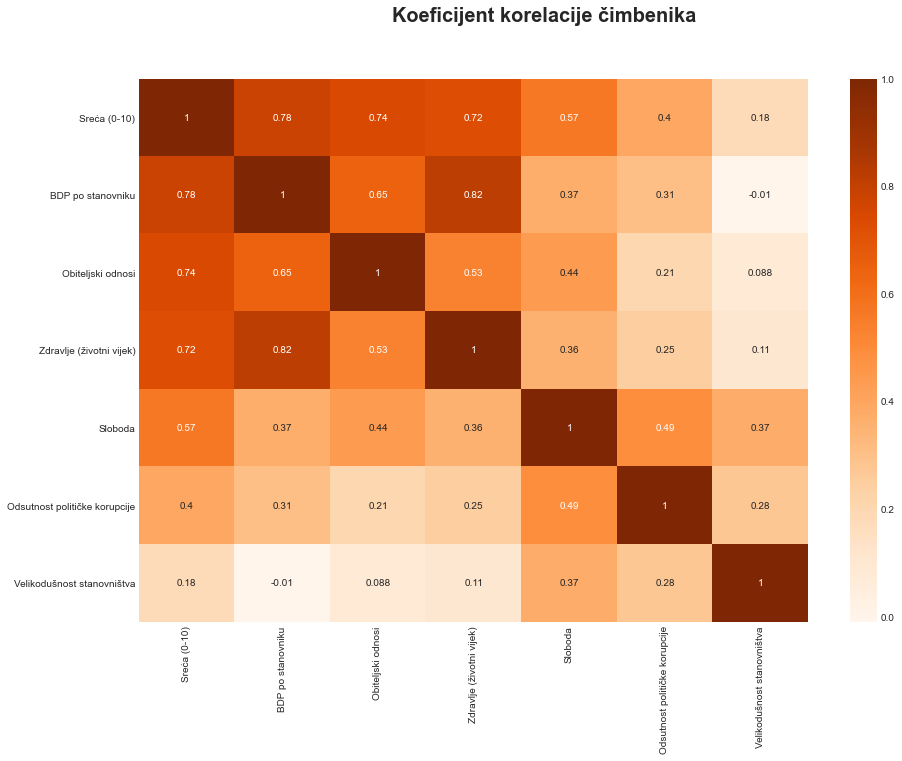

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
fig = sns.heatmap(podatci.drop(["Pozicija", "Ostatak (neobjašnjive komponente)"], axis=1).corr(), cmap="Oranges", annot = True)
plt.suptitle("Koeficijent korelacije čimbenika", fontsize=20, fontweight='bold');

Iz ove tablice moguće je primijetiti kako je koeficijent korelacije sreće najveći s ekonomskim stanjem države (0.78) što potvrđuje prijašnje navedenu tezu, no također je vidljivo kako obiteljski odnosi pojedinca (0.74) i zdravlje (0.72) uvelike utječu na sreću pojedinca. Vrijedi istaknuti također kako je najveća korelacija između zdravlja ili životnog vijeka pojedinca s ekonomskim stanjem države (0.82) što znači da ekonomsko stanje unutar države direktno utječe na njeno zdravstvo i životni vijek pojedinca te države <br><br><br>

### Sreća pojedinca prema regijama

Iz tablice podataka je vidljivo kako se na dnu nalaze slabo razvijene države, uglavnom iz Afrike, a one prema vrhu su dobro razvijene države Europe i Amerike. Kako bi utvrdili gdje se nalaze ostale regije moguće je vizualizirati prosječnu sreću pojedinca prema regiji

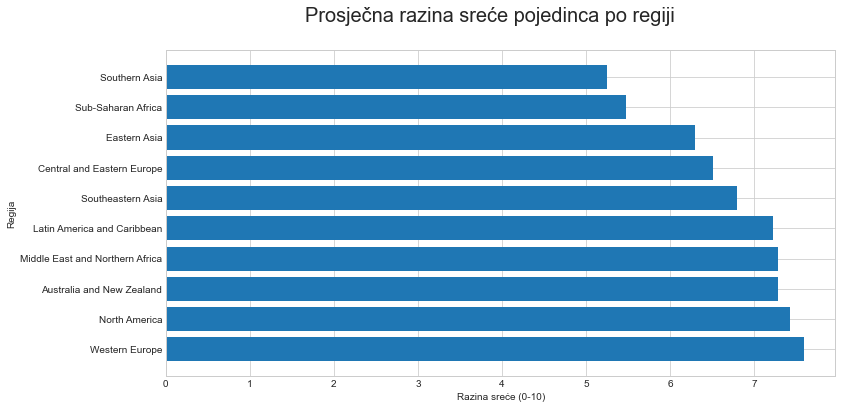

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

fig = ax.barh(y=podatci["Regija"],
              width=podatci["Sreća (0-10)"])

ax.set(xlabel="Razina sreće (0-10)",
       ylabel="Regija")

plt.suptitle("Prosječna razina sreće pojedinca po regiji",
             fontsize=20);

Iz ovoga grafa moguće je doći do više zaključaka:

* samo su u Supsaharskom dijelu Afrike i južnom dijelu Azije pojedinci nesretniji nego u ostalim dijelovima svijeta 
* Azija i Supsaharska Afrika su najnesretniji kontinenti
* stanovnici središnje i istočne Europe (gdje se nalazi i Hrvatska) su nesretiniji nego većina ostalih kontinenata
* zapadna Europa i Sjeverna Amerika imaju najsretnije stanovnike

### Uspoređivanje sreće i čimbenika Hrvatske u odnosnu na ostale zemlje

Kao što je prijašnje navedeno, središnja i istočna Europa je 4. najnesretnija regija na svijetu, gdje se također ubraja i Hrvatska. Kako bismo bolje razumjeli gdje se točno Hrvatska nalazi u usporedbi s ostalim srednjoeuropskim i istočno europskim zemljama, možemo usporediti ocjenu sreće pojedinca i gdje su te zemlje sveukupno rangirane.

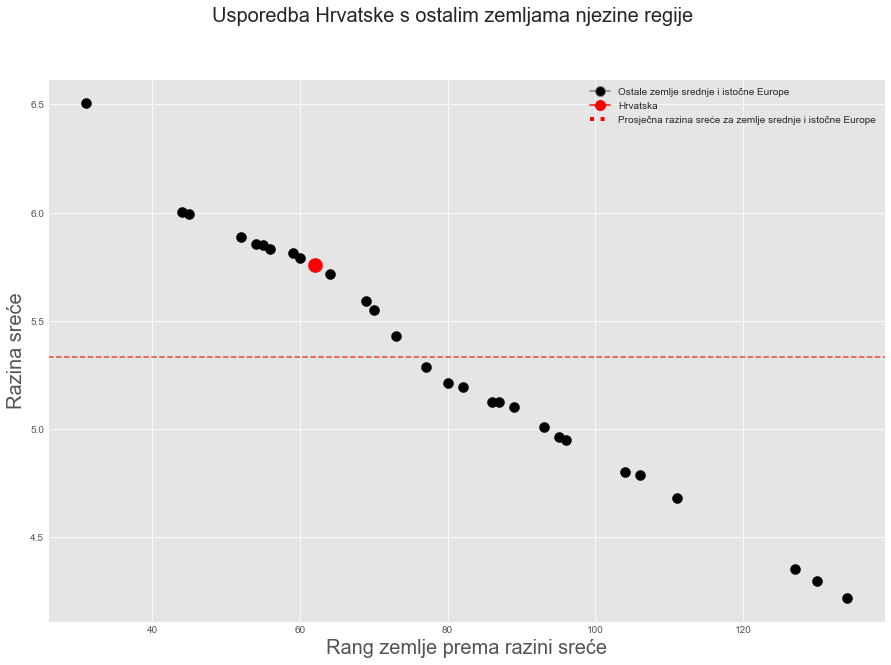

In [54]:
import warnings
warnings.filterwarnings(action="ignore")
from matplotlib.lines import Line2D

si_europa = podatci[podatci["Regija"] == "Central and Eastern Europe"]
hrv = si_europa[podatci["Država"] == "Croatia"]
ostala_europa = si_europa.drop(62, axis=0)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(15,10))

fig = ax.scatter(x=ostala_europa["Pozicija"],
                 y=ostala_europa["Sreća (0-10)"],
                 s=100,
                 c="Black")

fig = ax.scatter(x=hrv["Pozicija"],
                 y=hrv["Sreća (0-10)"],
                 s=200,
                 c="Red")

plt.xlabel("Rang zemlje prema razini sreće", fontsize=20)
plt.ylabel("Razina sreće", fontsize=20)

plt.suptitle("Usporedba Hrvatske s ostalim zemljama njezine regije", fontsize=20);

ax.axhline(si_europa["Sreća (0-10)"].mean(),
           linestyle='--')

legend_elements = [
    Line2D([0], [0], marker='o', color="Gray", label='Ostale zemlje srednje i istočne Europe', 
           markerfacecolor='Black', markersize=10),
    Line2D([0], [0], marker='o', color="Red", label='Hrvatska', 
           markerfacecolor='Red', markersize=10),
    Line2D([0], [0], color='Red', linestyle='dotted', lw=4, label='Prosječna razina sreće za zemlje srednje i istočne Europe')
]

ax.legend(handles=legend_elements, loc='top-right');

<br><br>Uz pomoć grafa može se zaključiti da Hrvatska ima bolje rezultate nego većina zemalja srednje i istočne Europe, a razlog toga položaja utvridi će se kasnije detaljnom analizom svakoga čimbenika te kako on utječe na sreću hrvatskog stanovništva.<br>
Iz grafa su također i vidljivi ekstremi u razini sreće pojedinca.<br>
Pri vrhu se nalazi Češka Republika čija razina sreće pojedinca sadrži 6.505, a njihov vodeći faktor ili čimbenik su obiteljski odnosi.<br>
Na dnu se nalazi Bugarska s najnižom razinom sreće pojedinca u središnjoj i istočnoj Europi koja sadrži 4.218 te njihov najniži faktor je odsutnost političke korupcije. Razlog tomu je što je Bugarska poznata kao jedna od najkorumpiranijih zemalja te ima najveći indeks percepcije korupcije (CPI) od svih članica EU što ju čini najkorumpiranijom zemljom Europske Unije. Njihova vlada je optužena za mnoga krivotvorine, ilegalni utjecaj na tržište i mito.<br><br>

### Usporedba čimbenika (faktora) koji utječu na sreću kod Hrvatske i ostalih zemalja svijeta 